# Part1. 고구마 가격 상관관계 분석

### 원천 데이터
- 고구마 검색량:
    - [네이버 데이터랩](https://datalab.naver.com/keyword/trendResult.naver?hashKey=N_925b6ca0d470958daec578dc0c3851c6)
    - 2016년 ~ 2020년 연간, 월간 '고구마' 검색량
- 기상 데이터:
    - [농업관측 통계정보시스템](https://oasis.krei.re.kr/analyzer/kma.do)
    - 2016년 ~ 2020년 월간 기상데이터(평균기온, 강수량, 일사량, 습도, 순간최대풍속)
- 고구마와 감자 생산량, 단수, 면적:
    - [KOSIS 농작물생산조사](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ET0027&vw_cd=MT_ZTITLE&list_id=K1_19&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do)
    - 2016년 ~ 2020년 연간 데이터
- 고구마 소매가격:
    - [KAMIS 농산물 유통정보](https://www.kamis.or.kr/customer/price/wholesale/item.do)
    - 2016년 ~ 2020년 연간, 월간 고구마 소매가격(전국, 전남, 전북, 경기, 충남)
- 고구마 경매정보:
    - [서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-2662/S/1/datasetView.do)
    - 서울시 농수산물 경매정보 중 2017년 ~ 2021년 '고구마' 품목 경매정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ('AppleGothic', 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. 연간 피처들과 지역별 고구마 소매가격 분석

- 피처(X): 기상(평균온도, 강수량, 일사량, 순간최대풍속, 습도), 고구마 및 감자 생산량, 고구마 검색량
- 타겟(Y): 전국, 충청남도, 경기도(수원과의정부), 전라남도(순천), 전라북도(전주) 고구마 소매가격 (고구마 최다 생산지 top4 지역)

In [3]:
# 데이터 불러오기
data = pd.read_csv('data/total/전국통합.csv')
data

,년,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량,전국평균,충청남도평균,경기도평균,전라남도평균,전라북도평균
0,2016,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421,4489,4479.0,4647.5,5072,3925
1,2017,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323,4680,4476.0,5010.5,4826,3884
2,2018,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921,5682,5266.0,6159.0,5797,4551
3,2019,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353,5042,4619.0,5212.0,4902,4684
4,2020,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749,5861,5607.0,6060.0,5801,5481


In [4]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       5 non-null      int64  
 1   평균온도    5 non-null      float64
 2   강수량     5 non-null      float64
 3   일사량     5 non-null      float64
 4   순간최대풍속  5 non-null      float64
 5   습도      5 non-null      float64
 6   고구마생산량  5 non-null      int64  
 7   감자생산량   5 non-null      int64  
 8   검색량     5 non-null      float64
 9   전국평균    5 non-null      int64  
 10  충청남도평균  5 non-null      float64
 11  경기도평균   5 non-null      float64
 12  전라남도평균  5 non-null      int64  
 13  전라북도평균  5 non-null      int64  
dtypes: float64(8), int64(6)
memory usage: 688.0 bytes


In [5]:
# 컬럼명
data.columns

Index(['년', '평균온도', '강수량', '일사량', '순간최대풍속', '습도', '고구마생산량', '감자생산량', '검색량',
       '전국평균', '충청남도평균', '경기도평균', '전라남도평균', '전라북도평균'],
      dtype='object')

## 1.1 최다 생산지별로 분리하여 분석
- 가설: 최대 생산지의 고구마 소매가격이 전체 고구마 소매가격에 영향이 있을 것이다
- 전국(a), 충남(c), 경기(g), 전남(js), 전북(jn)

In [7]:
# 전국
data_a = data[['전국평균','평균온도', '강수량','일사량','순간최대풍속','습도','고구마생산량','감자생산량','검색량']]

# 충남
data_c = data[['충청남도평균', '평균온도', '강수량','일사량','순간최대풍속','습도','고구마생산량','감자생산량','검색량']]

# 경기
data_g = data[['경기도평균','평균온도', '강수량','일사량','순간최대풍속','습도','고구마생산량','감자생산량','검색량']]

# 전남
data_js = data[['전라남도평균','평균온도', '강수량','일사량','순간최대풍속','습도','고구마생산량','감자생산량','검색량']]

# 전북
data_jn = data[['전라북도평균','평균온도', '강수량','일사량','순간최대풍속','습도','고구마생산량','감자생산량','검색량']]

### 상관계수
- 상관관계의 정도를 나타내는 수치
    - 0.2 미만: 상관관계가 거의 없다.
    - 0.2 ~ 0.4 미만: 상관관계가 있으나 낮다.
    - 0.4 ~ 0.7 미만: 상관관계가 있다.
    - 0.7 ~ 0.9 미만: 상관관계가 높다.
    - 0.9 이상: 상관관계가 아주높다.
- 피어슨 : 두 계량형 변수 사이의 선형 관계를 평가
- 스피어만 : 두 계량형 변수 또는 순서형 변수 사이의 단순 관계를 평가


## 1.2 전국평균과 각 피처들의 상관관계

In [9]:
data_a

,전국평균,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량
0,4489,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421
1,4680,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323
2,5682,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921
3,5042,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353
4,5861,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749


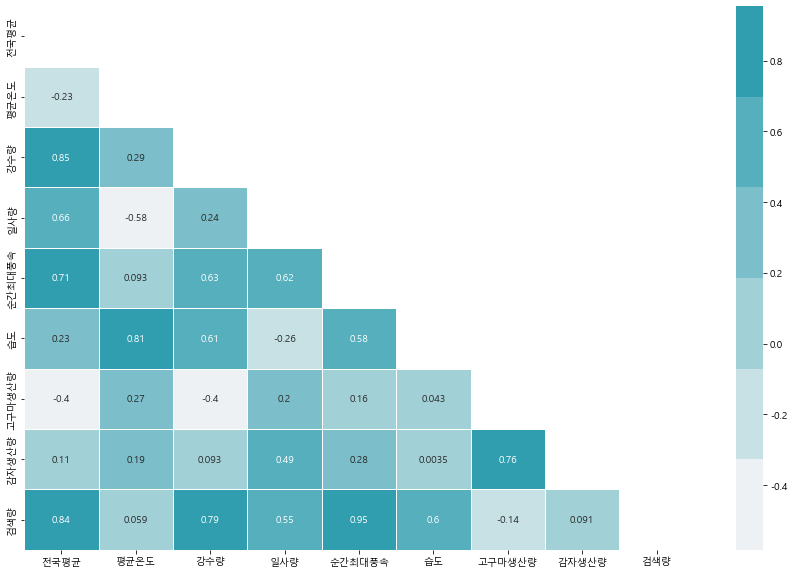

In [14]:
## 피어슨
dac = data_a.corr(method= 'pearson')

mask = np.zeros_like(dac, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dac, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

- 전국 평균과 각 피처들 간의 상관관계 시각화
- 전국 평균에 '검색량, 강수량, 순간최대풍속' 피처들이 영향이 높은 것으로 나타난다.
- 고구마 생산량과 감자 생산량과의 연관성이 높은것으로 나타난다.

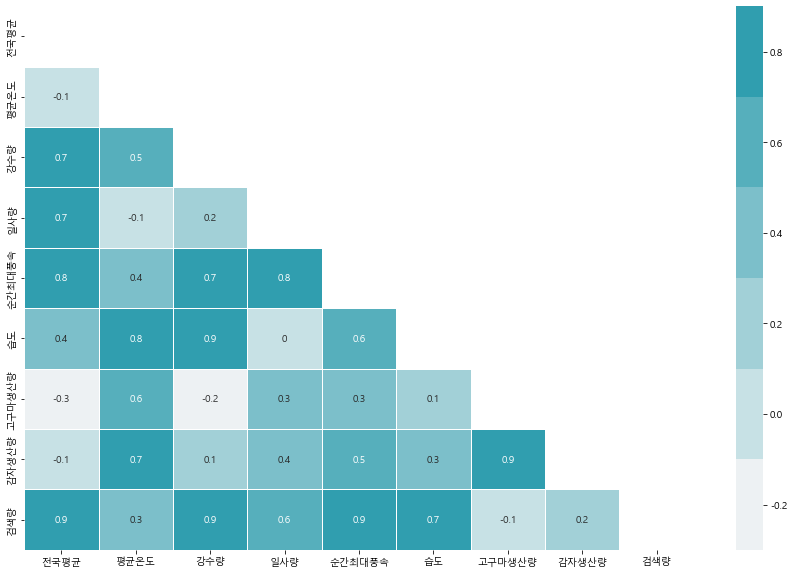

In [17]:
## 스피어만
das = data_a.corr(method= 'spearman')

mask = np.zeros_like(das, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(das, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

- 피어슨 상관관계와 유사한 결과를 보인다.

#### 상관관계 0.4 이상

<AxesSubplot:>

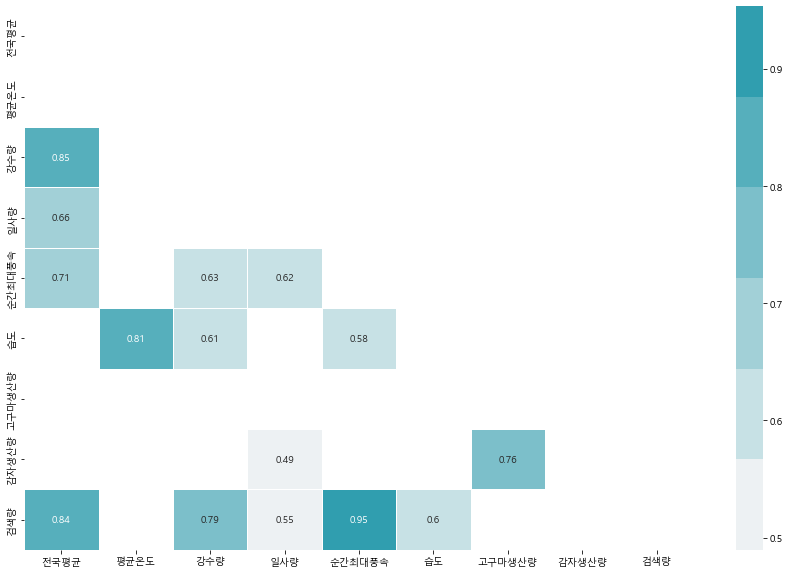

In [19]:
dac_p = dac[dac>=0.4]

mask = np.zeros_like(dac, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dac_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

- 상관관계가 있는 피처들만 시각화(0.4 기준)
- 검색량과 기후중 강수량, 일사량, 순간최대풍속이 높게 나타난다.

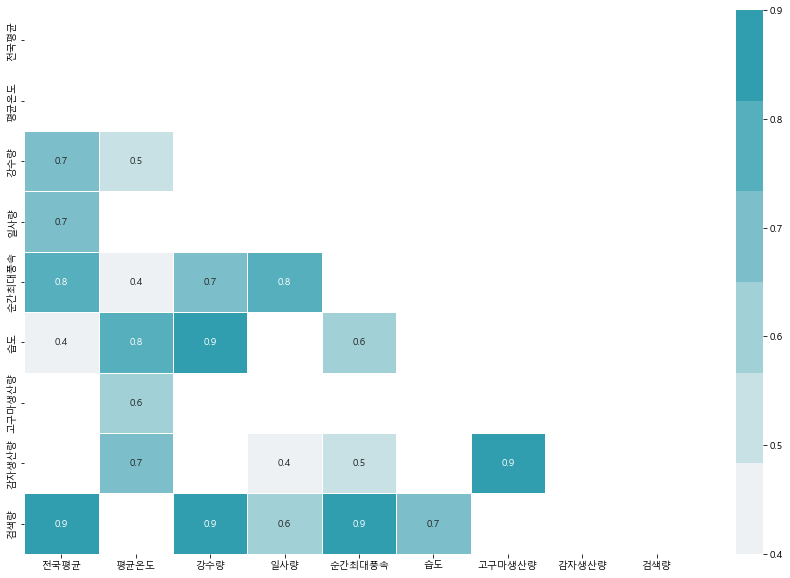

In [21]:
das_p = das[das>=0.4]

mask = np.zeros_like(das, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(das_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

- 상관관계가 있는 피처들만 시각화(0.4 기준)
- 검색량과 습도, 풍속, 일사량, 강수량이 높게 나타난다.

In [22]:
dac.sort_values(by='전국평균', ascending=False)[['전국평균']]

,전국평균
전국평균,1.000000
강수량,0.849750
검색량,0.842386
순간최대풍속,0.706775
일사량,0.659994
습도,0.226142
감자생산량,0.110196
평균온도,-0.232719
고구마생산량,-0.399811


- 전국과 소매가격의 피어슨 상관계수는 강수량, 검색량, 풍속, 일사량 순으로 높게 나타난다.

In [23]:
das.sort_values(by='전국평균', ascending=False)[['전국평균']]

,전국평균
전국평균,1.0
검색량,0.9
순간최대풍속,0.8
강수량,0.7
일사량,0.7
습도,0.4
평균온도,-0.1
감자생산량,-0.1
고구마생산량,-0.3


- 전국과 소매가격의 스피어만 상관계수는 검색량, 풍속, 강수량, 일사량 순으로 높게 나타난다.

## 1.3 지역별 각 피처들과의 상관관계

###### 1.3.1 충청남도

In [24]:
data_c

,충청남도평균,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량
0,4479.0,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421
1,4476.0,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323
2,5266.0,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921
3,4619.0,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353
4,5607.0,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749


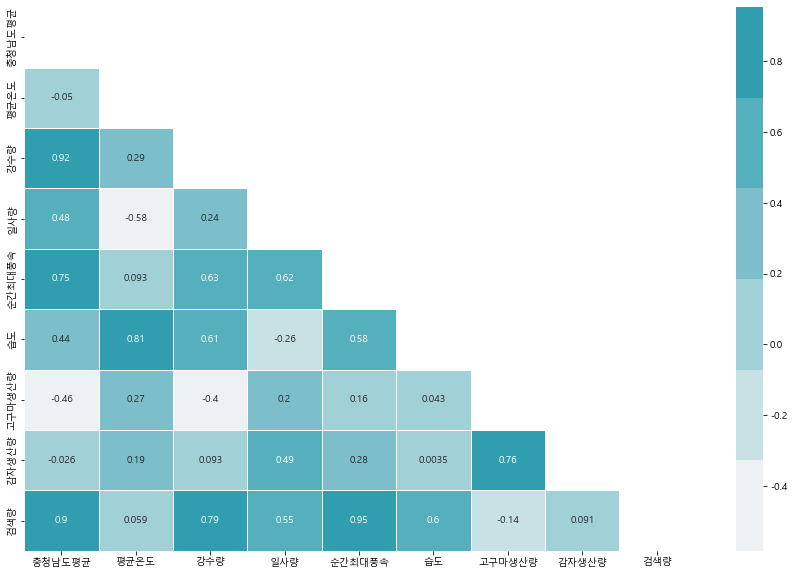

In [26]:
## 피어슨
dcc = data_c.corr(method= 'pearson')

mask = np.zeros_like(dcc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dcc, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

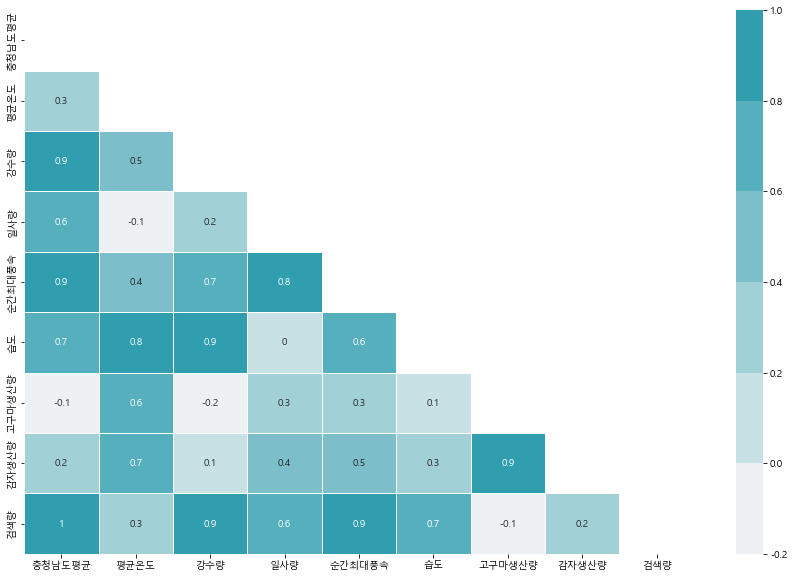

In [27]:
## 스피어만
dcs = data_c.corr(method= 'spearman')

mask = np.zeros_like(dcs, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dcs, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

#### 상관관계 0.4 이상

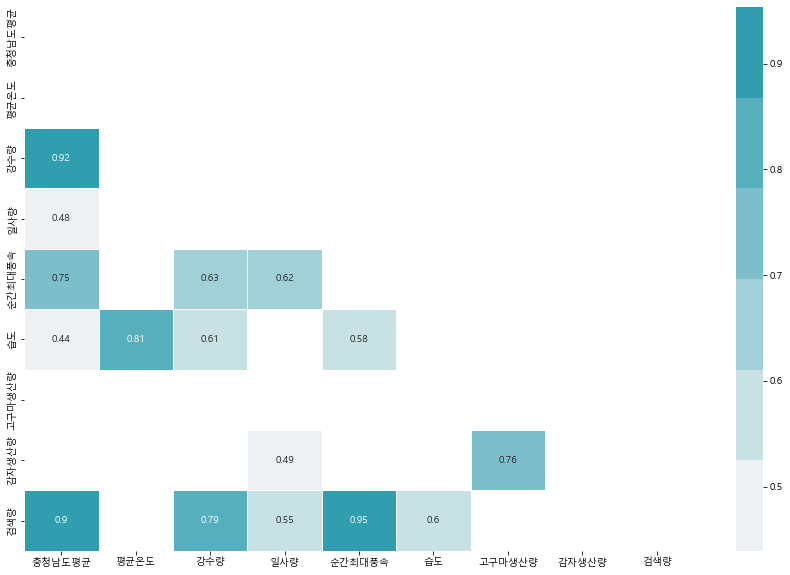

In [29]:
dcc_p = dcc[dcc>=0.4]

mask = np.zeros_like(dcc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dcc_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

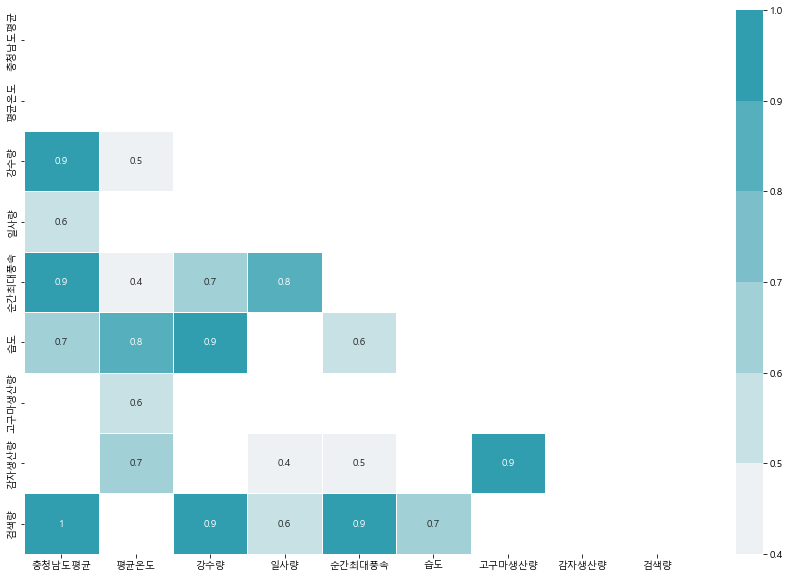

In [30]:
dcs_p = dcs[dcs>=0.4]

mask = np.zeros_like(dcs, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dcs_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

In [31]:
dcc.sort_values(by='충청남도평균', ascending=False)[['충청남도평균']]

,충청남도평균
충청남도평균,1.000000
강수량,0.920130
검색량,0.902724
순간최대풍속,0.746319
일사량,0.484504
습도,0.439357
감자생산량,-0.025971
평균온도,-0.050246
고구마생산량,-0.463606


- 충청남도와 소매가격의 피어슨 상관계수는 강수량, 검색량, 풍속, 일사량, 습도순으로 높게 나타난다.

In [32]:
dcs.sort_values(by='충청남도평균', ascending=False)[['충청남도평균']]

,충청남도평균
충청남도평균,1.0
검색량,1.0
강수량,0.9
순간최대풍속,0.9
습도,0.7
일사량,0.6
평균온도,0.3
감자생산량,0.2
고구마생산량,-0.1


- 충청남도와 소매가격의 스피어만 상관계수는 검색량, 강수량 풍속, 습도, 일사량 순으로 높게 나타난다.

###### 1.3.2 경기도

In [33]:
data_g

,경기도평균,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량
0,4647.5,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421
1,5010.5,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323
2,6159.0,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921
3,5212.0,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353
4,6060.0,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749


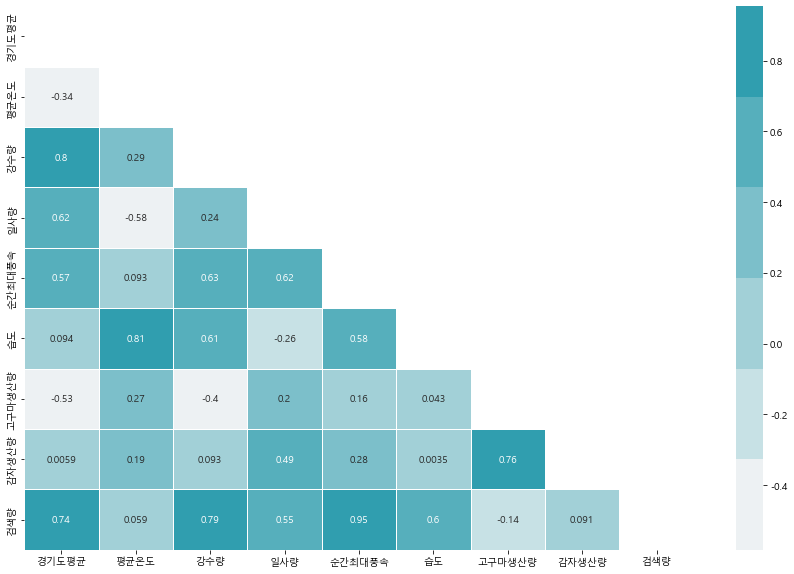

In [36]:
## 피어슨
dgc = data_g.corr(method= 'pearson')

mask = np.zeros_like(dgc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dgc, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

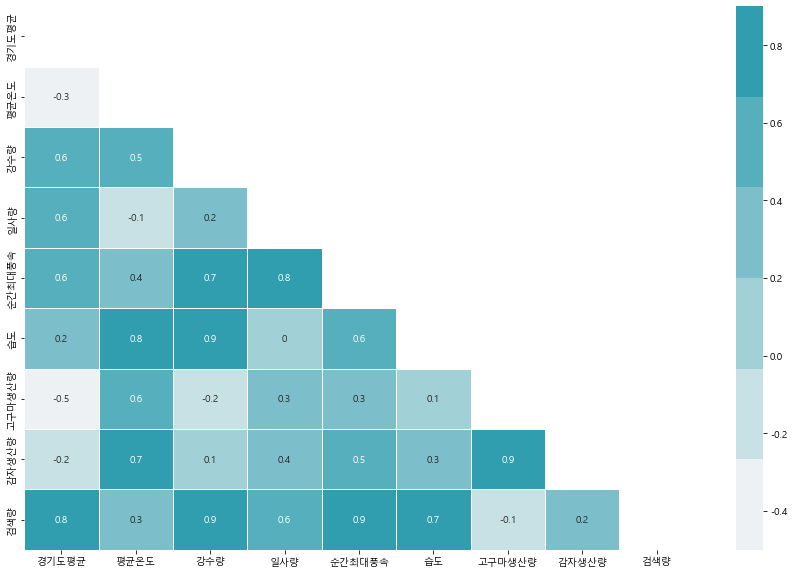

In [37]:
## 스피어만
dgs = data_g.corr(method= 'spearman')

mask = np.zeros_like(dgs, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dgs, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

#### 상관관계 0.4 이상

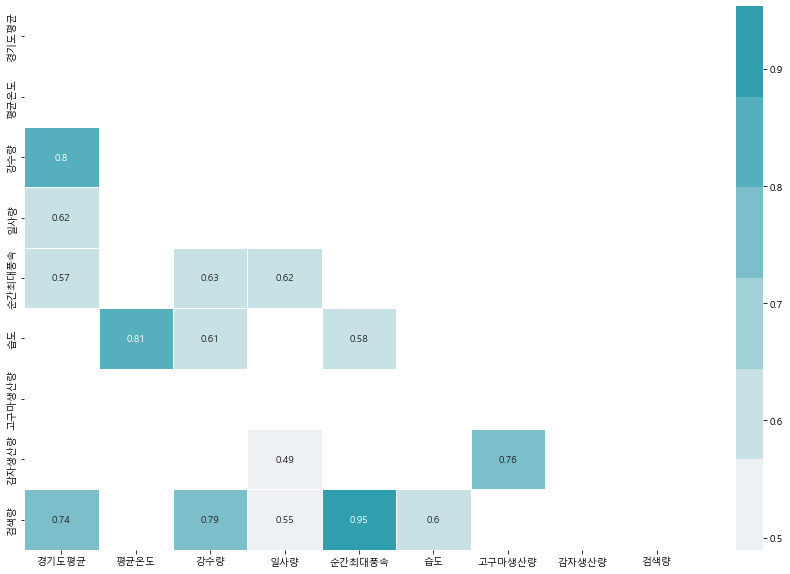

In [40]:
dgc_p = dgc[dgc>=0.4]

mask = np.zeros_like(dgc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dgc_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

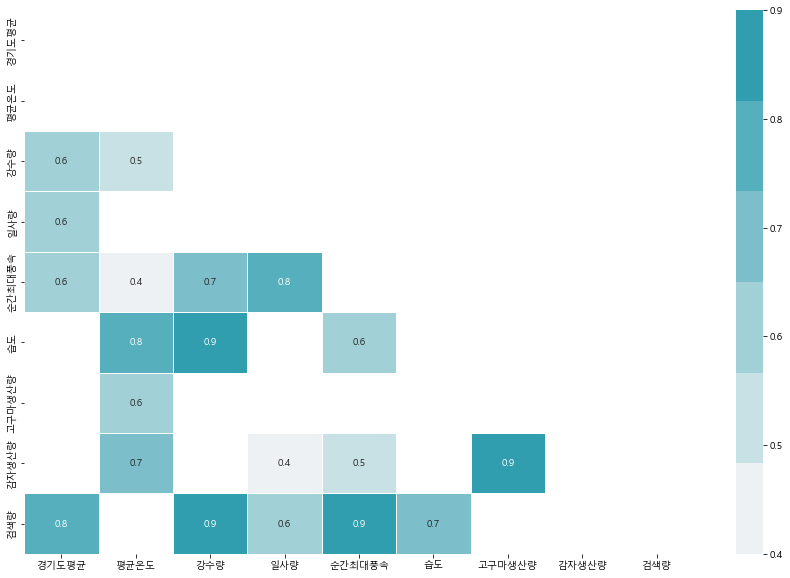

In [39]:
dgs_p = dgs[dgs>=0.4]

mask = np.zeros_like(dgs, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(dgs_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

In [41]:
dgc.sort_values(by='경기도평균', ascending=False)[['경기도평균']]

,경기도평균
경기도평균,1.000000
강수량,0.804582
검색량,0.740207
일사량,0.616257
순간최대풍속,0.567290
습도,0.093896
감자생산량,0.005884
평균온도,-0.338920
고구마생산량,-0.532962


- 경기도와 소매가격의 피어슨 상관계수는 강수량, 검색량, 일사량, 풍속 순으로 높게 나타난다.

In [42]:
dgs.sort_values(by='경기도평균', ascending=False)[['경기도평균']]

,경기도평균
경기도평균,1.0
검색량,0.8
강수량,0.6
일사량,0.6
순간최대풍속,0.6
습도,0.2
감자생산량,-0.2
평균온도,-0.3
고구마생산량,-0.5


- 경기도와 소매가격의 스피어만 상관계수는 검색량, 강수량, 일사량, 풍속 순으로 높게 나타난다.

###### 1.3.3 전라남도

In [43]:
data_js

,전라남도평균,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량
0,5072,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421
1,4826,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323
2,5797,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921
3,4902,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353
4,5801,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749


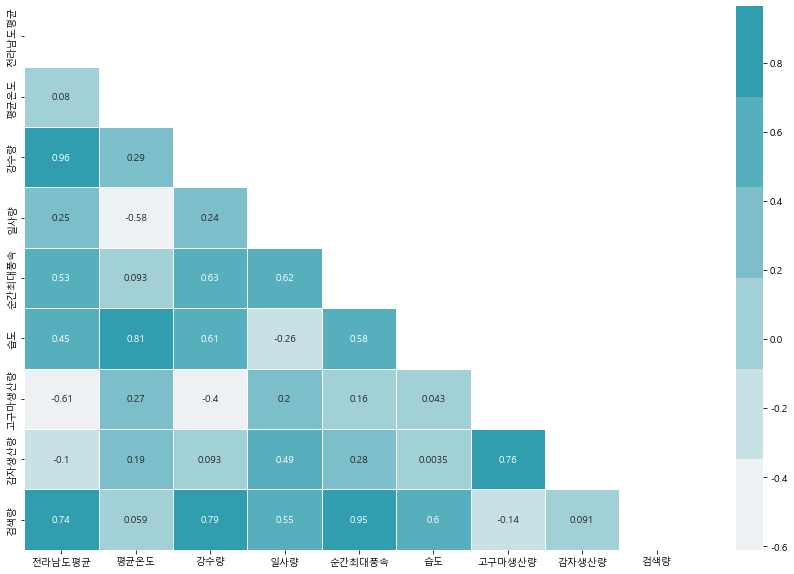

In [45]:
## 피어슨
djsc = data_js.corr(method= 'pearson')

mask = np.zeros_like(djsc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djsc, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

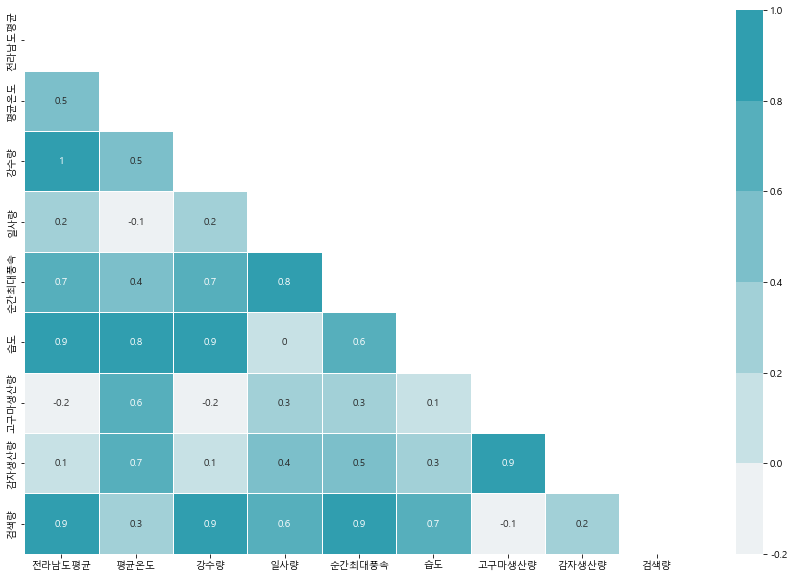

In [46]:
## 스피어만
djss = data_js.corr(method= 'spearman')

mask = np.zeros_like(djss, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djss, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

#### 상관관계 0.4이상

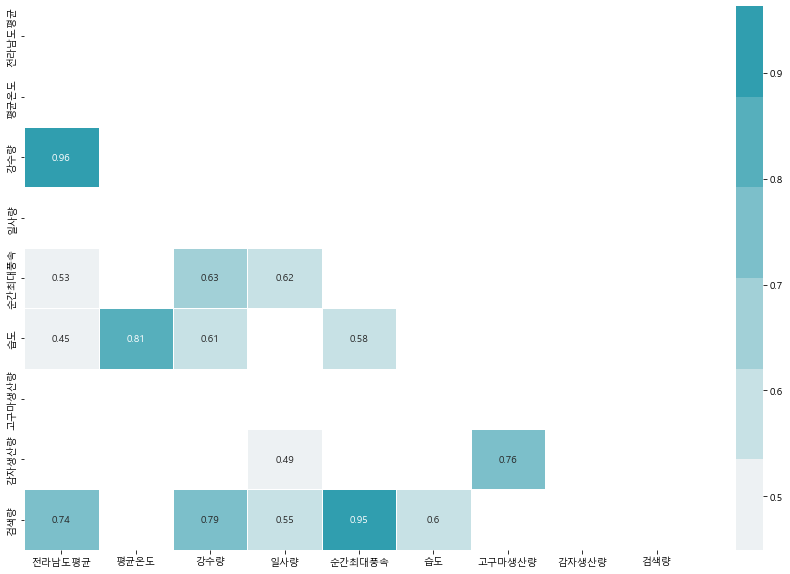

In [48]:
djsc_p = djsc[djsc>=0.4]

mask = np.zeros_like(djsc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djsc_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

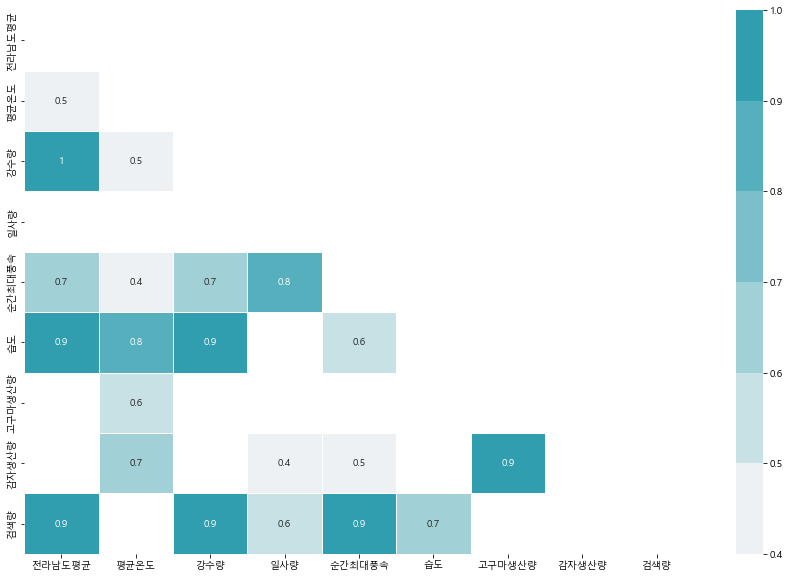

In [49]:
djss_p = djss[djss>=0.4]

mask = np.zeros_like(djss, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djss_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

In [50]:
djsc.sort_values(by='전라남도평균', ascending=False)[['전라남도평균']]

,전라남도평균
전라남도평균,1.000000
강수량,0.963089
검색량,0.743845
순간최대풍속,0.528977
습도,0.449250
일사량,0.248790
평균온도,0.079920
감자생산량,-0.101646
고구마생산량,-0.610594


- 전라남도와 소매가격의 피어슨 상관계수는 강수량, 검색량, 풍속, 습도 순으로 높게 나타난다.

In [51]:
djss.sort_values(by='전라남도평균', ascending=False)[['전라남도평균']]

,전라남도평균
전라남도평균,1.0
강수량,1.0
습도,0.9
검색량,0.9
순간최대풍속,0.7
평균온도,0.5
일사량,0.2
감자생산량,0.1
고구마생산량,-0.2


- 전라남도와 소매가격의 스피어만 상관계수는 강수량, 습도, 검색량, 풍속, 평균온도 순으로 높게 나타난다.

###### 1.3.4 전라북도

In [52]:
data_jn

,전라북도평균,평균온도,강수량,일사량,순간최대풍속,습도,고구마생산량,감자생산량,검색량
0,3925,13.278333,641.176667,352.841667,13.960000,73.194167,341225,555670,37.260421
1,3884,12.355833,520.458333,391.087500,13.936667,70.478333,324960,466755,37.214323
2,4551,12.549167,753.650000,403.328333,14.123333,71.081667,305304,548065,48.592921
3,4684,12.631667,600.931667,428.606667,14.598333,70.961667,368324,690419,45.349353
4,5481,12.835000,793.888333,417.910000,15.645000,73.768333,329927,553194,77.300749


###### 1.3.4 전라북도

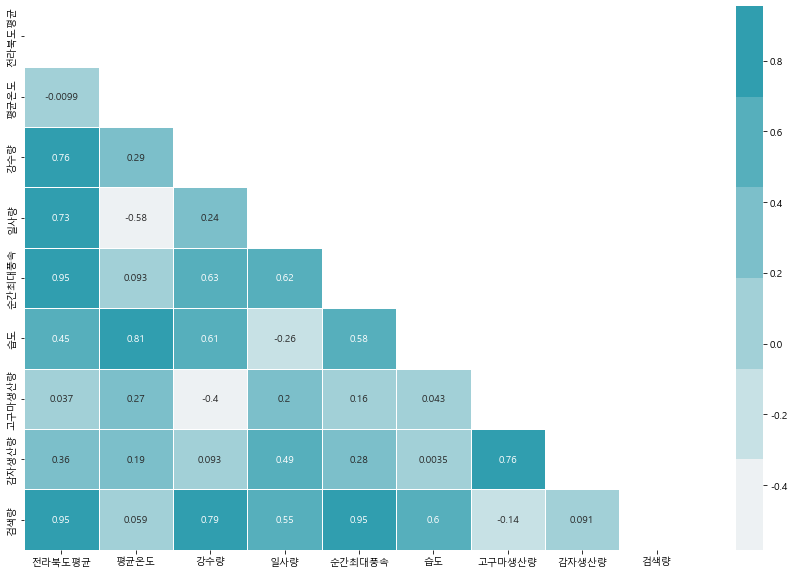

In [53]:
## 피어슨
djnc = data_jn.corr(method= 'pearson')

mask = np.zeros_like(djnc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djnc, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

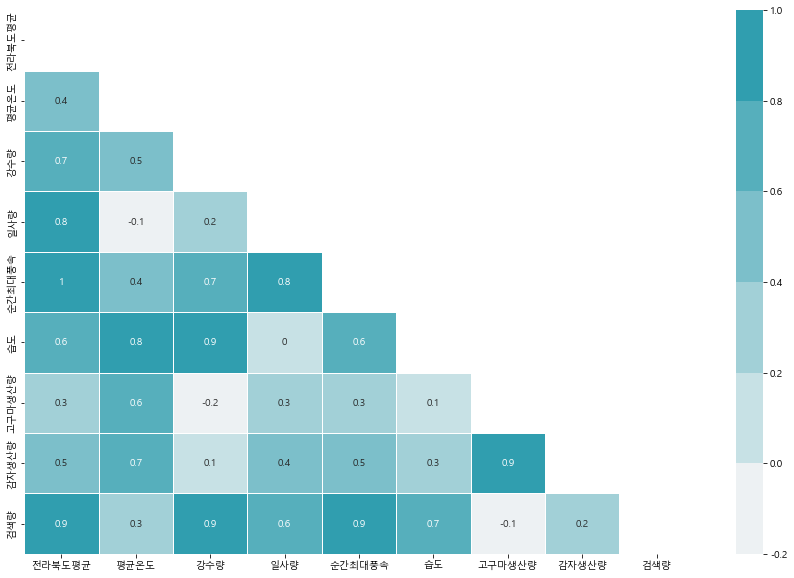

In [54]:
## 스피어만
djns = data_jn.corr(method= 'spearman')

mask = np.zeros_like(djns, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djns, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

#### 상관관계 0.4이상

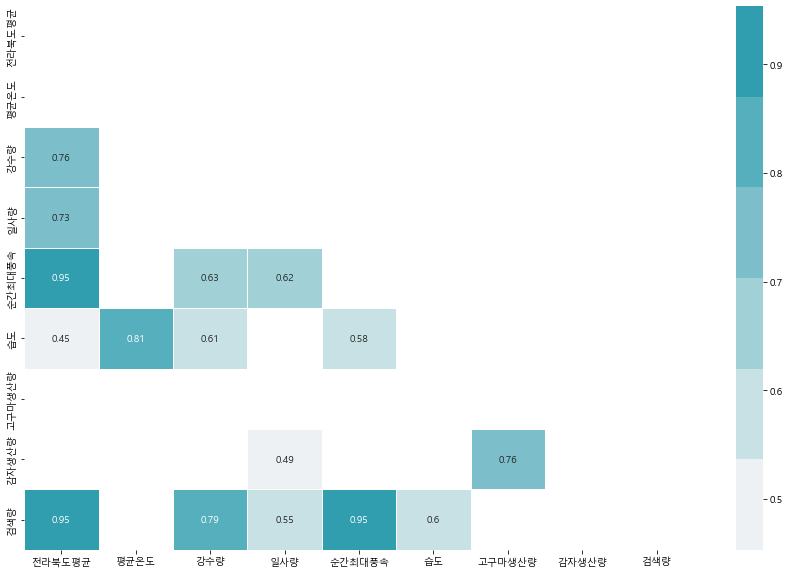

In [55]:
djnc_p = djnc[djnc>=0.4]

mask = np.zeros_like(djnc, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djnc_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

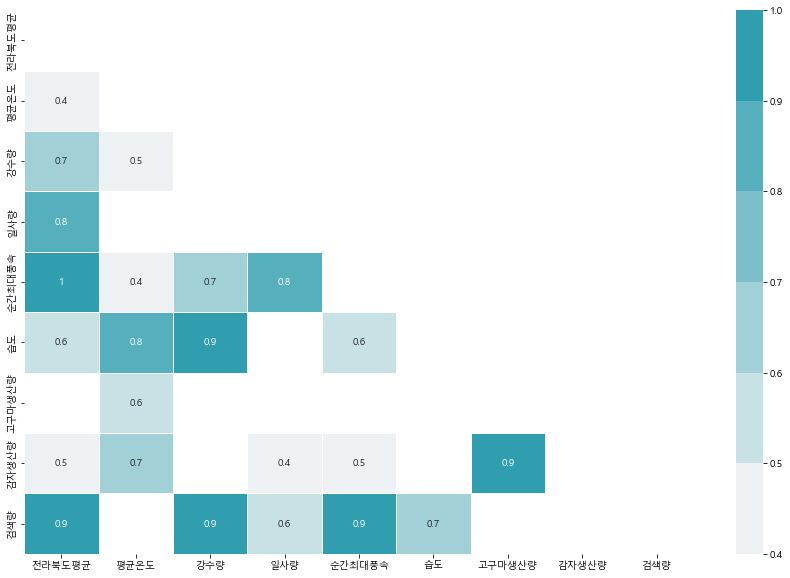

In [56]:
djns_p = djns[djns>=0.4]

mask = np.zeros_like(djns, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
plt.figure(figsize=(15, 10))

sns.heatmap(djns_p, mask = mask, annot=True, cmap=cmap, linewidths=0.5);

In [57]:
djnc.sort_values(by='전라북도평균', ascending=False)[['전라북도평균']]

,전라북도평균
전라북도평균,1.000000
검색량,0.951344
순간최대풍속,0.949100
강수량,0.759503
일사량,0.725110
습도,0.452952
감자생산량,0.364171
고구마생산량,0.037467
평균온도,-0.009921


- 전라북도와 소매가격의 피어슨 상관계수는 검색량, 풍속, 강수량, 일사량, 습도 순으로 높게 나타난다.

In [58]:
djns.sort_values(by='전라북도평균', ascending=False)[['전라북도평균']]

,전라북도평균
전라북도평균,1.0
순간최대풍속,1.0
검색량,0.9
일사량,0.8
강수량,0.7
습도,0.6
감자생산량,0.5
평균온도,0.4
고구마생산량,0.3


- 전라북도와 소매가격의 스피어만 상관계수는 풍속, 검색량, 일사량, 강수량, 습도, 감자생산량 순으로 높게 나타난다.

### 종합

- 피어슨
    - 전국: 강수량>검색량>풍속>일사량
    - 충청남도: 강수량>검색량>풍속>일사량>습도
    - 경기도: 강수량>검색량>일사량>풍속
    - 전라남도: 강수량>검색량>풍속>습도
    - 전라북도: 검색량>풍속>강수량>일사량>습도

- 스피어만
    - 전국: 검색량>풍속>강수량>일사량
    - 충청남도:검색량>강수량>풍속>습도>일사량
    - 경기도: 검색량>강수량>일사량>풍속
    - 전라남도: 강수량>습도>검색량>풍속>평균온도
    - 전라북도: 풍속>검색량>일사량>강수량>습도>감자생산량

=> 소매가격과 전국 및 각 산지별(충청남도, 경기도, 전라남도, 전라북도)의 상관관계는 비슷하게 나타나지만 지역별로 작은 차이를 볼 수 있다.